# Heat Equation - FD

## Finite-difference scheme for the one-dimensional heat equation

We consider here the heat equation on [0, x] × [0, ∞) with boundary conditions 
u(x, 0) = sin(2πx) for all x ∈ [0, x] and 
u(0, t) = u(x, t) = 0 for all t ≥ 0. 

We apply a finite difference scheme, explicit in time and with central difference in space

### Import packages

In [27]:
import numpy as np 
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
from time import time


## Explicit Scheme in time

### No vector notation

--- Computtaion time: 0.8405578136444092 seconds ---


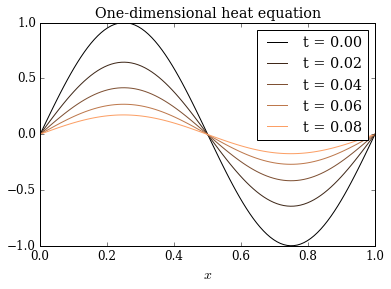

In [28]:
# set up simulation parameters
start_time = time()
sigma = 1.0
barX = 1.0
T = 0.1

nx = 100  # num of grid points
nt = 5000 # num of time steps

dx = barX / (nx - 1)   # Grid step in space
dt = T / nt            # Grid step in time

# Boundary conditions
x = np.linspace(0.0, barX, nx)
u = np.sin(2 * np.pi * x)

# Double loop
for n in range(0, nt): # for each time step
    for j in range(1, nx - 1):  # for each point in grid
        u[j] += dt * (0.5 * sigma * sigma) * \
            (u[j - 1] - 2 * u[j] + u[j + 1]) / (dx**2)
            
    # Plot every pp time steps
    pp = 100
    if (n % pp == 0):
        if (n % (10 * pp) == 0):
            plotlabel = "t = %1.2f" % (n * dt)
            pyplot.plot(x, u, label=plotlabel, color=pyplot.get_cmap(
                'copper')(float(n) / nt))

            
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.title(u'One-dimensional heat equation')
pyplot.legend()
temp = time() - start_time
print("--- Computtaion time: %s seconds ---" % temp)
pyplot.show()

        



## Vector Notation

--- Computtaion time: 0.11417794227600098 seconds ---


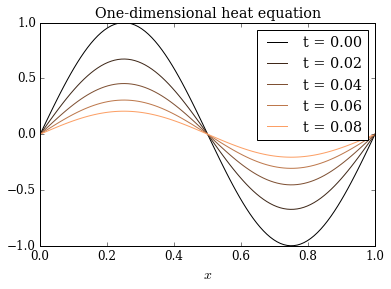

In [29]:
# set up simulation parameters
start_time = time()
sigma = 1.0
barX = 1.0
T = 0.1

nx = 100  # num of grid points
nt = 5000 # num of time steps

dx = barX / (nx - 1)   # Grid step in space
dt = T / nt            # Grid step in time

# Boundary conditions
x = np.linspace(0.0, barX, nx)
u = np.sin(2 * np.pi * x)
rhs = np.zeros(nx)

# Single loop
for n in range(0, nt): # for each time step
    rhs[1:-1] = dt * (0.5 * sigma * sigma) * \
            (u[:-2] - 2.0 * u[1:-1] + u[2:]) / (dx**2)
    u += rhs    
            
    # Plot every pp time steps
    pp = 100
    if (n % pp == 0):
        if (n % (10 * pp) == 0):
            plotlabel = "t = %1.2f" % (n * dt)
            pyplot.plot(x, u, label=plotlabel, color=pyplot.get_cmap(
                'copper')(float(n) / nt))

            
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.title(u'One-dimensional heat equation')
pyplot.legend()
temp = time() - start_time
print("--- Computtaion time: %s seconds ---" % temp)
pyplot.show()

        

